### 影响生存率的因子排序
‘PassengerId（乘客id）’, ‘Survived（是否活下来）’, ‘Pclass（船舱等级）’, ‘Name（姓名）’, ‘Sex（性别）’, ‘Age（年龄）’, ‘SibSp（兄弟姐妹同行数量）’,‘Parch（父母配偶同行数量）’, ‘Ticket（票）’, ‘Fare（费）’, ‘Cabin（船舱）’, ‘Embarked（上船站）’

更完整的分析参考：
https://www.sohu.com/a/289527053_165070

In [28]:
import pandas as pd
# 特征最影响结果的K个特征
from sklearn.feature_selection import SelectKBest
# 卡方检验，作为SelectKBest的参数
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
%matplotlib inline

In [29]:
origin_data = pd.read_csv("../datas/titanic/titanic_train.csv")
origin_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# 查看整体信息
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
# 数据清洗，去掉无用列
# Cabin缺得太多，也无法填充，因此可以去掉
origin_data.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin'],inplace=True)

In [32]:
len(origin_data['Pclass'].unique())

3

In [33]:
# 查看不同因素的不同值数量
origin_data.apply(lambda x: len(x.unique()), axis=0)

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      4
dtype: int64

In [34]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [35]:
origin_data['Age'].fillna(origin_data['Age'].mean(), inplace=True)

In [36]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [37]:
origin_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [38]:
origin_data['Embarked'].fillna(0, inplace=True)

In [39]:
origin_data['Embarked'] = origin_data['Embarked'].map({'S':1, 'C':2, 'Q':3})

In [40]:
origin_data['Embarked'].fillna(0, inplace=True)

In [41]:
origin_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [42]:
origin_data.loc[origin_data['Sex']=='male', 'Sex'] = 0
origin_data.loc[origin_data['Sex']=='female','Sex'] = 1

In [43]:
origin_data.Sex.unique()

array([0, 1])

In [44]:
result = origin_data.pop('Survived')

In [45]:
origin_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1.0
1,1,1,38.0,1,0,71.2833,2.0
2,3,1,26.0,0,0,7.9250,1.0
3,1,1,35.0,1,0,53.1000,1.0
4,3,0,35.0,0,0,8.0500,1.0


In [46]:
factor = origin_data

In [47]:
result.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [48]:
features = SelectKBest(score_func=chi2, k=len(factor.columns))
features_1 = SelectKBest(score_func=f_classif, k=len(factor.columns))
fit = features.fit(factor, result)
fit_1 = features_1.fit(factor, result)

In [49]:
fit.scores_

array([3.08736994e+01, 1.70348127e+02, 2.46879258e+01, 2.58186538e+00,
       1.00974991e+01, 4.51831909e+03, 2.77101868e+00])

In [50]:
fit_1.scores_

array([115.03127219, 372.4057236 ,   4.35351609,   1.1105722 ,
         5.96346384,  63.03076423,   9.31842045])

In [61]:
score = pd.concat([pd.DataFrame(factor.columns), pd.Series(fit.scores_), pd.Series(fit_1.scores_)], axis=1)

In [62]:
score

,0,0,1
0,Pclass,30.873699,115.031272
1,Sex,170.348127,372.405724
2,Age,24.687926,4.353516
3,SibSp,2.581865,1.110572
4,Parch,10.097499,5.963464
5,Fare,4518.319091,63.030764
6,Embarked,2.771019,9.318420


In [63]:
score.columns=['feature_name', 'score_1', 'score_2']

In [64]:
score

,feature_name,score_1,score_2
0,Pclass,30.873699,115.031272
1,Sex,170.348127,372.405724
2,Age,24.687926,4.353516
3,SibSp,2.581865,1.110572
4,Parch,10.097499,5.963464
5,Fare,4518.319091,63.030764
6,Embarked,2.771019,9.318420


In [65]:
score.sort_values(by='score_1', ascending= False)

,feature_name,score_1,score_2
5,Fare,4518.319091,63.030764
1,Sex,170.348127,372.405724
0,Pclass,30.873699,115.031272
2,Age,24.687926,4.353516
4,Parch,10.097499,5.963464
6,Embarked,2.771019,9.318420
3,SibSp,2.581865,1.110572


In [82]:
def normalize(df, name):
    print(df)
    # smin = df[name].min()
    # smax = df[name].max()
    # dur = smax - smin
    # col = f'{name}_normal'
    # print(col)
    # df[col] = df[name].apply(lambda x : x - smin / dur)
    return df

In [85]:
# score.apply(normalize, 'score_1')
# score.info()
s1min = score.score_1.min()
s1max = score.score_1.max()
score['normal_1'] = (score['score_1'] - s1min )/ (s1max-s1min)
score['normal_1']

0    0.006265
1    0.037151
2    0.004895
3    0.000000
4    0.001664
5    1.000000
6    0.000042
Name: normal_1, dtype: float64

In [86]:
min2 = score.score_2.min()
max2 = score.score_2.max();
score['normal_2'] = score['score_2'].apply(lambda x: (x - min2)/(max2-min2))

In [87]:
score

,feature_name,score_1,score_2,normal_1,normal_2
0,Pclass,30.873699,115.031272,0.006265,0.306820
1,Sex,170.348127,372.405724,0.037151,1.000000
2,Age,24.687926,4.353516,0.004895,0.008734
3,SibSp,2.581865,1.110572,0.000000,0.000000
4,Parch,10.097499,5.963464,0.001664,0.013070
5,Fare,4518.319091,63.030764,1.000000,0.166768
6,Embarked,2.771019,9.318420,0.000042,0.022106


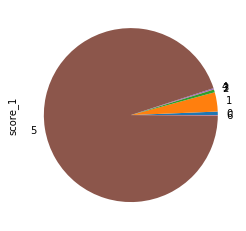

In [88]:
score['score_1'].plot(kind='pie')

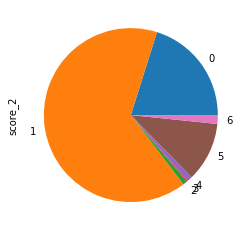

In [89]:
score['score_2'].plot(kind='pie')

In [92]:
score['per1'] = score['score_1']/ score['score_1'].sum()
score['per2'] = score['score_2']/ score['score_2'].sum()

In [93]:
score

,feature_name,score_1,score_2,normal_1,normal_2,per1,per2
0,Pclass,30.873699,115.031272,0.006265,0.306820,0.006487,0.201380
1,Sex,170.348127,372.405724,0.037151,1.000000,0.035790,0.651955
2,Age,24.687926,4.353516,0.004895,0.008734,0.005187,0.007622
3,SibSp,2.581865,1.110572,0.000000,0.000000,0.000542,0.001944
4,Parch,10.097499,5.963464,0.001664,0.013070,0.002121,0.010440
5,Fare,4518.319091,63.030764,1.000000,0.166768,0.949291,0.110345
6,Embarked,2.771019,9.318420,0.000042,0.022106,0.000582,0.016313


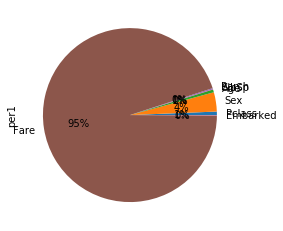

In [98]:
score['per1'].plot(kind='pie', labels=score['feature_name'], autopct='%1.0f%%')

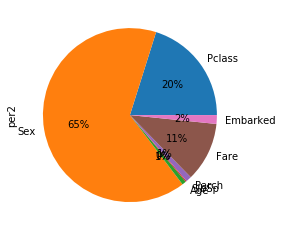

In [97]:
score['per2'].plot(kind='pie', labels=score['feature_name'], autopct='%1.0f%%')